In [23]:
import seaborn as sns
import pandas as pd
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.colors import ListedColormap
from scipy.spatial.distance import pdist, squareform
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster


In [14]:
#Load the generalized ipc data 
weighted_df = pd.read_csv('data/weighted_pop_ipc_region.csv')
density_df = pd.read_csv('data/density_pop_ipc_region.csv')


In [26]:
weighted_df['ipc'] = weighted_df['ipc'].apply(lambda x: 2 if abs(x - 2.12) < 0.01 else x)
density_df['ipc'] = density_df['ipc'].apply(lambda x: 2 if abs(x - 2.12) < 0.01 else x)

wei_anom = weighted_df[['ipc', 'rain_anom', 'et_anom', 'ndvi_anom']]
den_anom = density_df[['ipc', 'rain_anom', 'et_anom', 'ndvi_anom']]

weighted_df = weighted_df[['ipc', 'ruggedness_mean', 'pasture_pct', 'et_mean', 'ndvi_mean']]
density_df = density_df[['ipc', 'ruggedness_mean', 'pasture_pct', 'et_mean', 'ndvi_mean']]

In [44]:
# Define a function to filter outliers using z-scores and return both filtered and outliers DataFrames
def filter_outliers(df, threshold=3):
    z_scores = ((df - df.mean()) / df.std()).abs()
    is_outlier = (z_scores >= threshold).any(axis=1)
    outliers_df = df[is_outlier]
    filtered_df = df[~is_outlier]
    return filtered_df, outliers_df

# Filter outliers from density_df based on 'ruggedness_mean' and 'pasture_pct'
filtered_density_df, outliers_density_df = filter_outliers(density_df[['ruggedness_mean', 'pasture_pct']])


In [49]:
filtered_density_df['ipc'] = density_df['ipc']
filtered_density_df['et_mean'] = density_df['et_mean']
filtered_density_df['ndvi_mean'] = density_df['ndvi_mean']

den_anom['rugg_anom'] = outliers_density_df['ruggedness_mean']
den_anom['past_anom'] = outliers_density_df['pasture_pct']


In [75]:
anom = den_anom.dropna(how='any')
anom

ipc  rain_anom    et_anom  ndvi_anom  rugg_anom  past_anom
768   2.0 -12.883660  -6.815429   85.50377   341473.8   70.00000
769   2.0 -11.781280  -9.082537   86.26440   341473.8   70.00000
770   2.0  -2.752008  -9.091104   93.74452   341473.8   70.00000
771   2.0  -5.185443  -3.854103   96.67332   341473.8   70.00000
772   2.0  -6.735065  -5.730164   87.65563   341473.8   70.00000
...   ...        ...        ...        ...        ...        ...
1915  3.0  10.354340   7.327099  120.34250   251978.2   76.38571
1916  3.0   2.410696   7.540446  116.52040   251978.2   76.38571
1917  3.0   3.305675  10.586360  132.72220   251978.2   76.38571
1918  3.0   0.627889   9.013170  134.66960   251978.2   76.38571
1919  3.0  -0.081325   6.576071  147.49890   251978.2   76.38571

[256 rows x 6 columns]

In [77]:
den_anom = den_anom[['ipc', 'rain_anom', 'et_anom', 'ndvi_anom']]

# PARALLEL COORDINATE PLOT

### MEAN DATAFRAMES

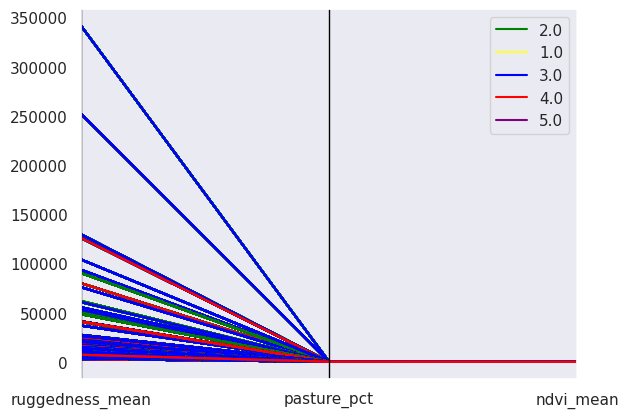

In [55]:
# Create a parallel coordinate plot for weighted_df
colors = ['#008000', '#FFFF33', '#0000FF', '#FF0000', '#800080']
cmap = ListedColormap(colors)

pd.plotting.parallel_coordinates(density_df, 'ipc', cols=['ruggedness_mean', 'pasture_pct', 'ndvi_mean'], colormap=cmap)
plt.show()

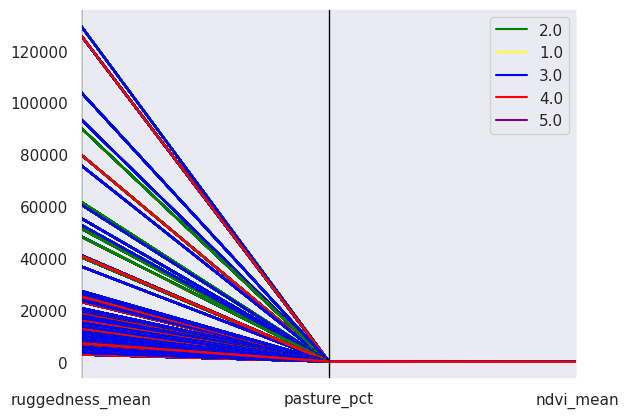

In [56]:
# Create a parallel coordinate plot for density_df
colors = ['#008000', '#FFFF33', '#0000FF', '#FF0000', '#800080']
cmap = ListedColormap(colors)

pd.plotting.parallel_coordinates(filtered_density_df, 'ipc', cols=['ruggedness_mean', 'pasture_pct', 'ndvi_mean'], colormap=cmap)
plt.show()

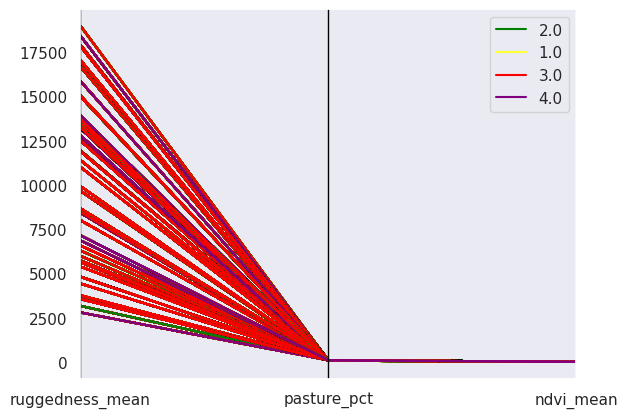

In [57]:
filt = density_df[(density_df['ruggedness_mean'] <= 20000)]
pd.plotting.parallel_coordinates(filt, 'ipc', cols=['ruggedness_mean', 'pasture_pct', 'ndvi_mean'], colormap=cmap)
plt.show()

### ANOMALIES DATAFRAMES

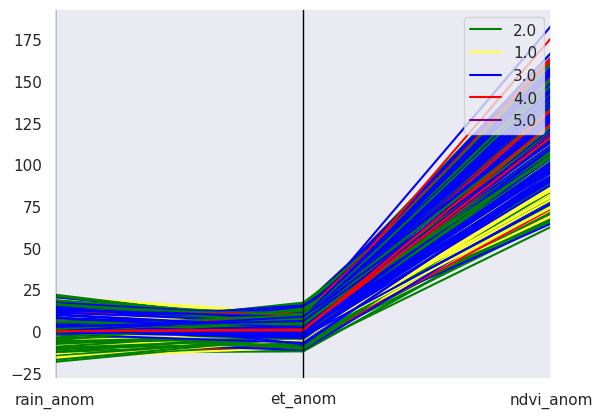

In [36]:
# Create a parallel coordinate plot for wei_anom
colors = ['#008000', '#FFFF33', '#0000FF', '#FF0000', '#800080']
cmap = ListedColormap(colors)

pd.plotting.parallel_coordinates(den_anom, 'ipc', colormap=cmap)
plt.show()

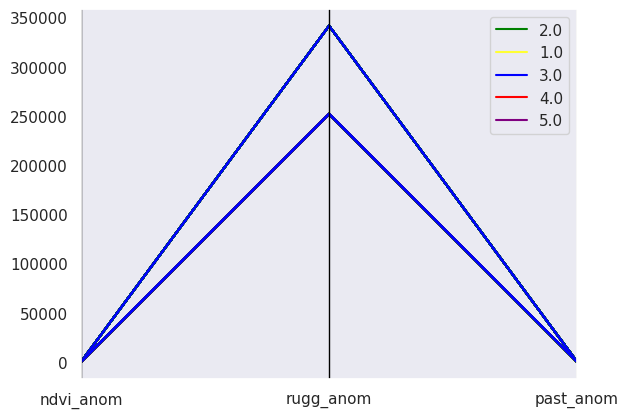

In [59]:
# Create a parallel coordinate plot for den_anom
colors = ['#008000', '#FFFF33', '#0000FF', '#FF0000', '#800080']
cmap = ListedColormap(colors)

pd.plotting.parallel_coordinates(anom, 'ipc', cols=['ndvi_anom', 'rugg_anom', 'past_anom'], colormap=cmap)
plt.show()

/tmp/ipykernel_5914/2461091867.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = hierarchy.linkage(distance_matrix)


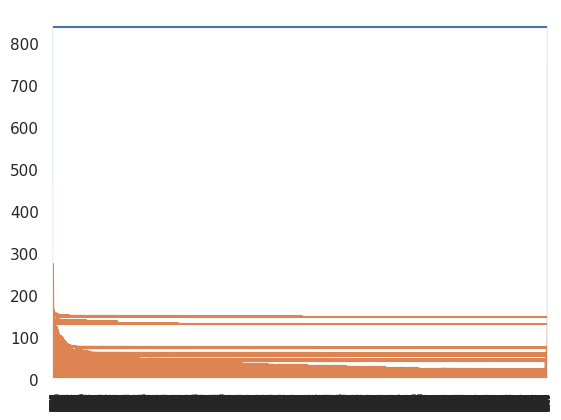

Outlier Indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 21

In [62]:

# Calculate the pairwise distances and create a distance matrix
distance_matrix_condensed = pdist(den_anom)
distance_matrix = squareform(distance_matrix_condensed)

# Calculate linkage for hierarchical clustering
linkage_matrix = hierarchy.linkage(distance_matrix, method='average')

# Create the dendrogram
dendrogram = hierarchy.dendrogram(linkage_matrix)

# Show the dendrogram
plt.show()

# Define a distance threshold for outlier detection
distance_threshold = 400  # Adjust this value as needed

# Get cluster assignments based on the distance threshold
clusters = fcluster(linkage_matrix, t=distance_threshold, criterion='distance')



/tmp/ipykernel_5914/2405995852.py:6: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



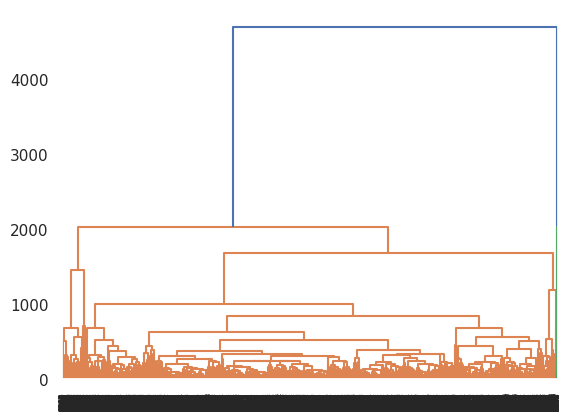

In [82]:

# Calculate the pairwise distances and create a distance matrix
distance_matrix_condensed = pdist(den_anom)
distance_matrix = squareform(distance_matrix_condensed)

# Calculate linkage for hierarchical clustering
linkage_matrix = hierarchy.linkage(distance_matrix, method='average')

# Create the dendrogram
dendrogram = hierarchy.dendrogram(linkage_matrix)

# Show the dendrogram
plt.show()

# Define a distance threshold for outlier detection
# distance_threshold = 100  # Adjust this value as needed
# 
# # Get cluster assignments based on the distance threshold
# clusters = fcluster(linkage_matrix, t=distance_threshold, criterion='distance')



/tmp/ipykernel_5914/719001488.py:6: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



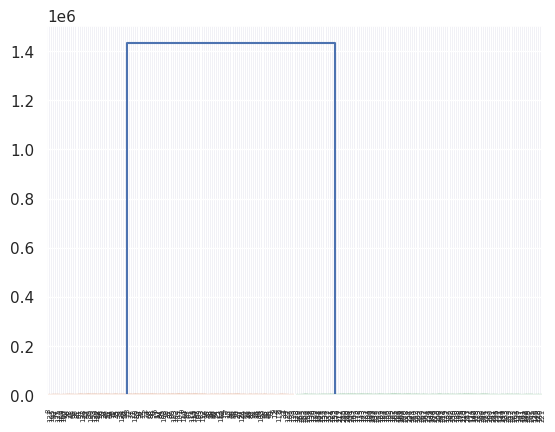

In [81]:

# Calculate the pairwise distances and create a distance matrix
distance_matrix_condensed = pdist(anom)
distance_matrix = squareform(distance_matrix_condensed)

# Calculate linkage for hierarchical clustering
linkage_matrix = hierarchy.linkage(distance_matrix, method='average')

# Create the dendrogram
dendrogram = hierarchy.dendrogram(linkage_matrix)

# Show the dendrogram
plt.show()



In [64]:

# Create a 3D scatter plot
fig = px.scatter_3d(den_anom, x='rain_anom', y='et_anom', z='ndvi_anom', color='ipc')
fig.show()


In [83]:

# Create a 3D scatter plot
fig = px.scatter_3d(anom, x='past_anom', y='rugg_anom', z='ndvi_anom', color='ipc')
fig.show()
